# Homework 5

### Luyao Wang
Netid: lw337

## Here is how to load and display the Chinese equivalent to MNIST

Data has been collected by K. Nazarpour and M. Chen at Newcastle university:
https://data.ncl.ac.uk/articles/dataset/Handwritten_Chinese_Numbers/10280831/1
Preprocessing was done by Gabriel Preda:
https://www.kaggle.com/data/174582

In [1]:
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams['axes.labelsize'] = 18
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
%matplotlib inline 
import keras
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
from keras.layers import (Conv2D, Dense, Dropout, Flatten,  # required for CNN
                          MaxPooling2D)
from keras.models import Sequential
# if you have problems with displaying minus signs in the exponents of numbers, uncomment the next two lines
from mplfonts import use_font
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# if you have problems with the visualization of the Chinese characters use mplfont
# from https://github.com/Clarmy/mplfonts
# pip install mplfonts
# mplfonts init


use_font('Noto Serif CJK SC')

2024-04-22 02:18:26.502267: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-22 02:18:26.502318: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-22 02:18:26.506141: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-22 02:18:26.560594: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-22 02:18:27.929377: W tensorflow/compiler/tf2

In [2]:
# loading images and labels 
with open('X.npy', 'rb') as np_file:
    X = np.load(np_file)

with open('y.npy', 'rb') as np_file:
    y = np.load(np_file)    

# loading dictionaries to display numerical values and characters    
import json
with open('value_dict.json','r') as json_file:
    value_dict = json.load(json_file)
    
with open('char_dict.json','r') as json_file:
    char_dict = json.load(json_file)    
    
number_char = len(char_dict)
print('number of classes:', number_char)    

number of classes: 15


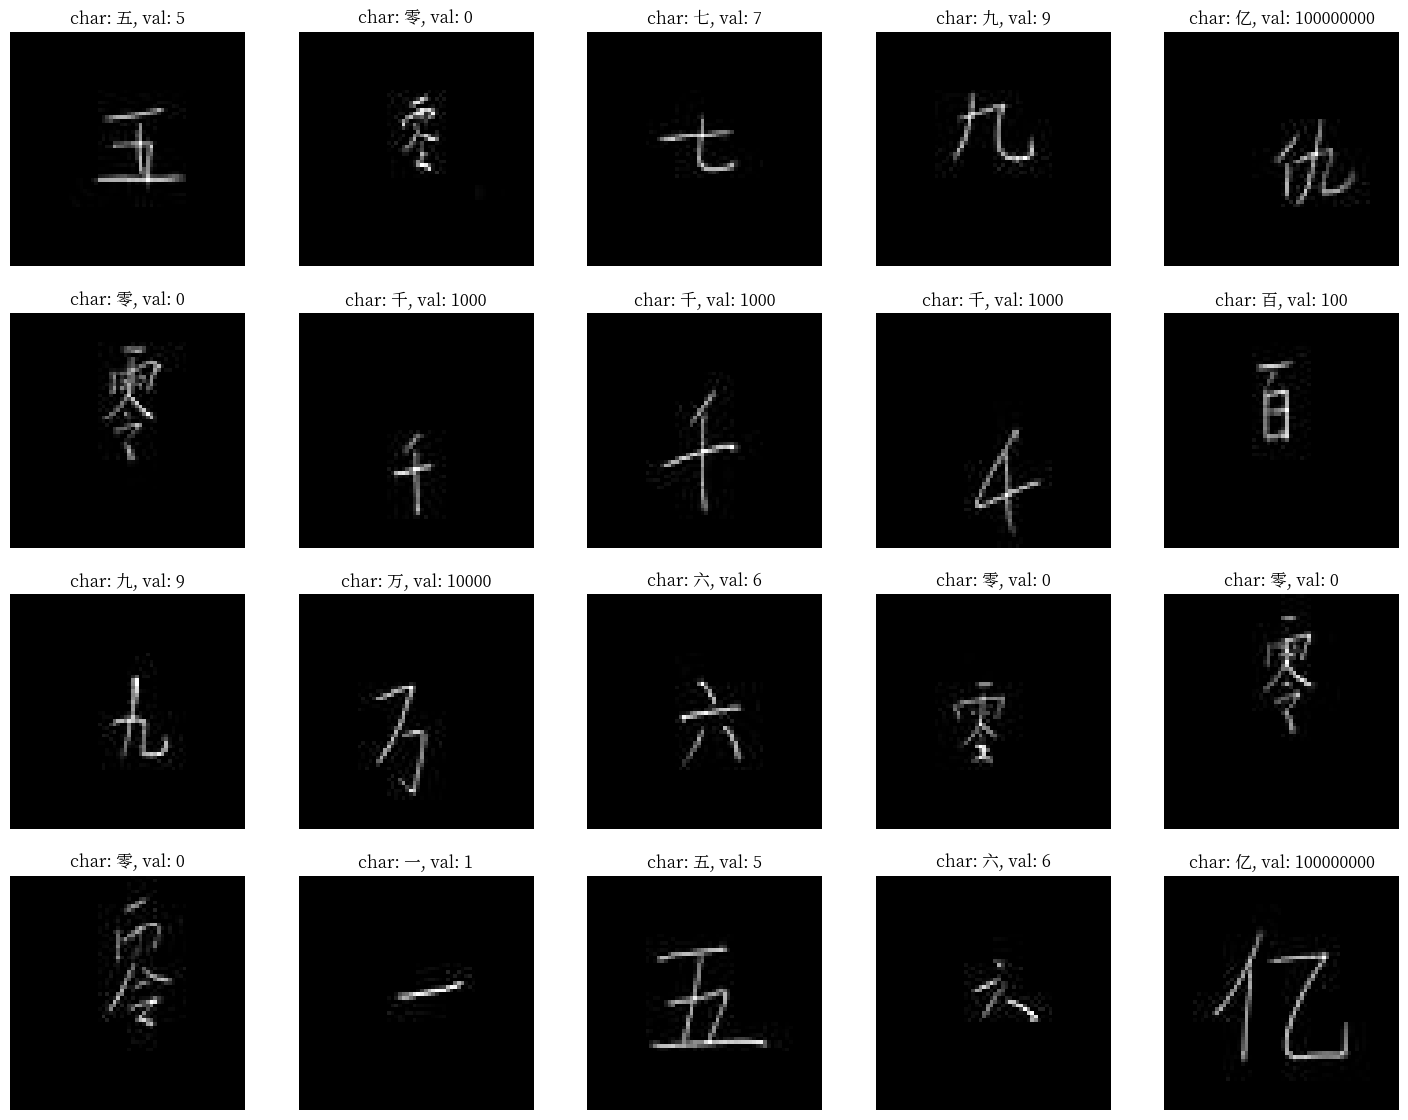

In [3]:
# preview the images
plt.figure(figsize=(18,14))

for i in range(20):  
    plt.subplot(4, 5, i+1)
    plt.imshow(X[i].reshape((64,64)),cmap='gray')
    key = str(y[i])
    plt.title('char: {}, val: {}'.format(char_dict[key],value_dict[key]))
    plt.axis('off')
plt.show()

In [4]:
# this array can be used for labeling the confusion matrix using seaborn
axis_labels = [
    char_dict["0"],
    char_dict["1"],
    char_dict["2"],
    char_dict["3"],
    char_dict["4"],
    char_dict["5"],
    char_dict["6"],
    char_dict["7"],
    char_dict["8"],
    char_dict["9"],
    char_dict["10"],
    char_dict["11"],
    char_dict["12"],
    char_dict["13"],
    char_dict["14"],
]
# you might also want to use: plt.yticks(rotation=0)

## 1) Chinese MNIST, using a CNN
**(3 points)**

Aim of this exercise is to train a CNN classifier for the 15 different Chinese characters for numbers. 

First prepare the data: turn *X* into a float in the range 0 to 1, and convert *y* to a one-hot vector. Then do an 0.7/0.3 train/test split.

Then built a CNN with 2 convolutional layers (each 3x3 filter size and relu activation, the first with 32, the second with 64 filters). After each convolution layer there should be a max pooling 2x2 layer.  After the second max pooling, built a sequence of a 25% droput, flatten, dense layer (128 neurons, relu), 50% dropout, and finally a softmax output layer. 

Train the CNN with categorical_crossentropy as loss function, Adam as optimizer, accuracy as metrics for 20 epochs with a batch size of 128.

Display your result by a) computing the accuracy on the test set, b) making two graphs how loss and accuracy change with epoch, and c) computing the confusion matrix.

**ANSWER**

In [5]:
X = X.astype("float32")
y = y.astype("uint8")
X /= 255
reshaped_X = X.reshape((-1, 64, 64, 1))

In [6]:
encoder = OneHotEncoder()
onehot_encoded = encoder.fit_transform(y.reshape(-1, 1))
onehot_array = onehot_encoded.toarray()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    reshaped_X, onehot_array, test_size=0.3, random_state=42
)

In [8]:
# built a Convolutional Neural Network
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(64, 64, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(15, activation="softmax"))

model.summary()

model.compile(
    loss="categorical_crossentropy",  # no need to use a one hot vector
    optimizer=keras.optimizers.Adam(),
    metrics=["accuracy"],
)

2024-04-22 02:18:31.576333: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 flatten (Flatten)           (None, 12544)             0

2024-04-22 02:18:31.628715: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-22 02:18:31.628774: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-22 02:18:31.632952: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-22 02:18:31.633057: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-22 02:18:31.633102: I external/local_xla/xla/stream_executor

In [9]:
batch_size = 128
epochs = 20

history = model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(X_test, y_test),
)

Epoch 1/20


2024-04-22 02:18:32.191576: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 172032000 exceeds 10% of free system memory.
2024-04-22 02:18:32.310383: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 172032000 exceeds 10% of free system memory.
2024-04-22 02:18:32.992013: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2024-04-22 02:18:33.094385: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
2024-04-22 02:18:34.190857: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f777919c0c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-04-22 02:18:34.190900: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 2060

83/83 [==============================] - 5s 25ms/step - loss: 1.9174 - accuracy: 0.4058 - val_loss: 1.0193 - val_accuracy: 0.7071
Epoch 2/20
83/83 [==============================] - 2s 19ms/step - loss: 0.9783 - accuracy: 0.6861 - val_loss: 0.5699 - val_accuracy: 0.8267
Epoch 3/20
83/83 [==============================] - 2s 19ms/step - loss: 0.6610 - accuracy: 0.7806 - val_loss: 0.3869 - val_accuracy: 0.8869
Epoch 4/20
83/83 [==============================] - 2s 19ms/step - loss: 0.4877 - accuracy: 0.8332 - val_loss: 0.3265 - val_accuracy: 0.9042
Epoch 5/20
83/83 [==============================] - 2s 19ms/step - loss: 0.3816 - accuracy: 0.8710 - val_loss: 0.2645 - val_accuracy: 0.9178
Epoch 6/20
83/83 [==============================] - 2s 19ms/step - loss: 0.3397 - accuracy: 0.8864 - val_loss: 0.2355 - val_accuracy: 0.9327
Epoch 7/20
83/83 [==============================] - 2s 20ms/step - loss: 0.2996 - accuracy: 0.8976 - val_loss: 0.1838 - val_accuracy: 0.9469
Epoch 8/20
83/83 [======

In [10]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss: {:.4}".format(score[0]))
print("Test accuracy: {:.4}".format(score[1]))

Test loss: 0.1132
Test accuracy: 0.9698


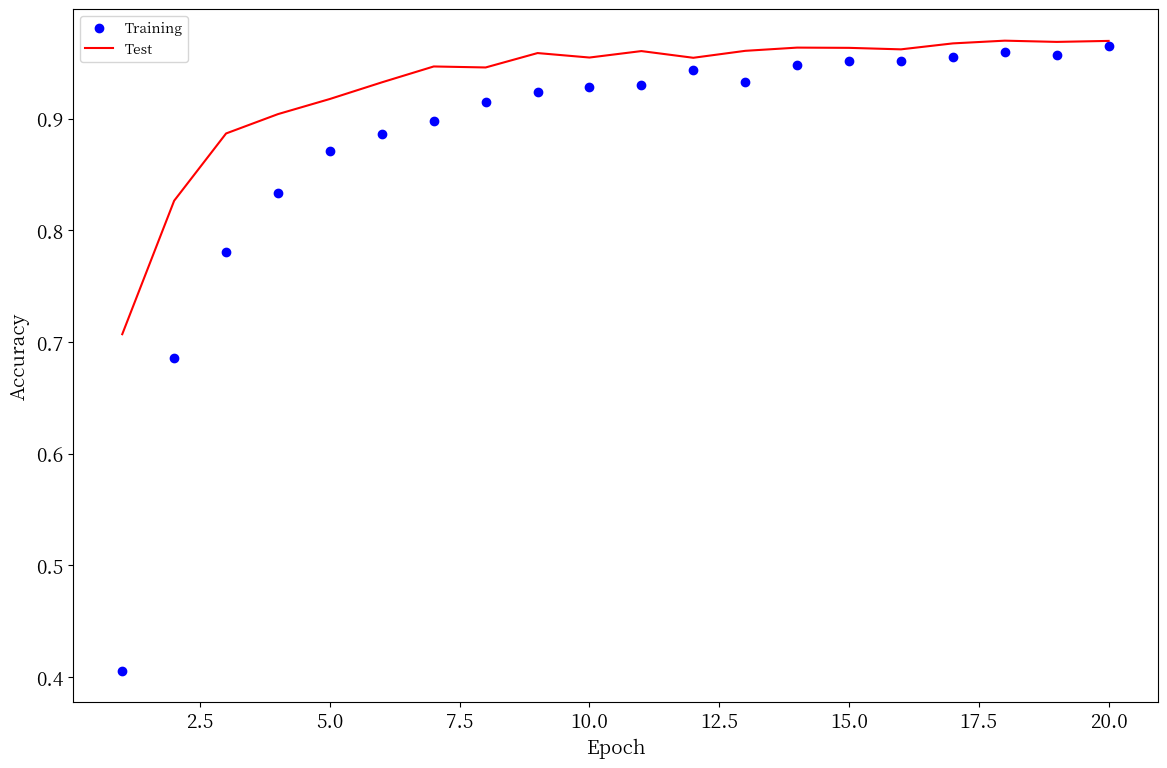

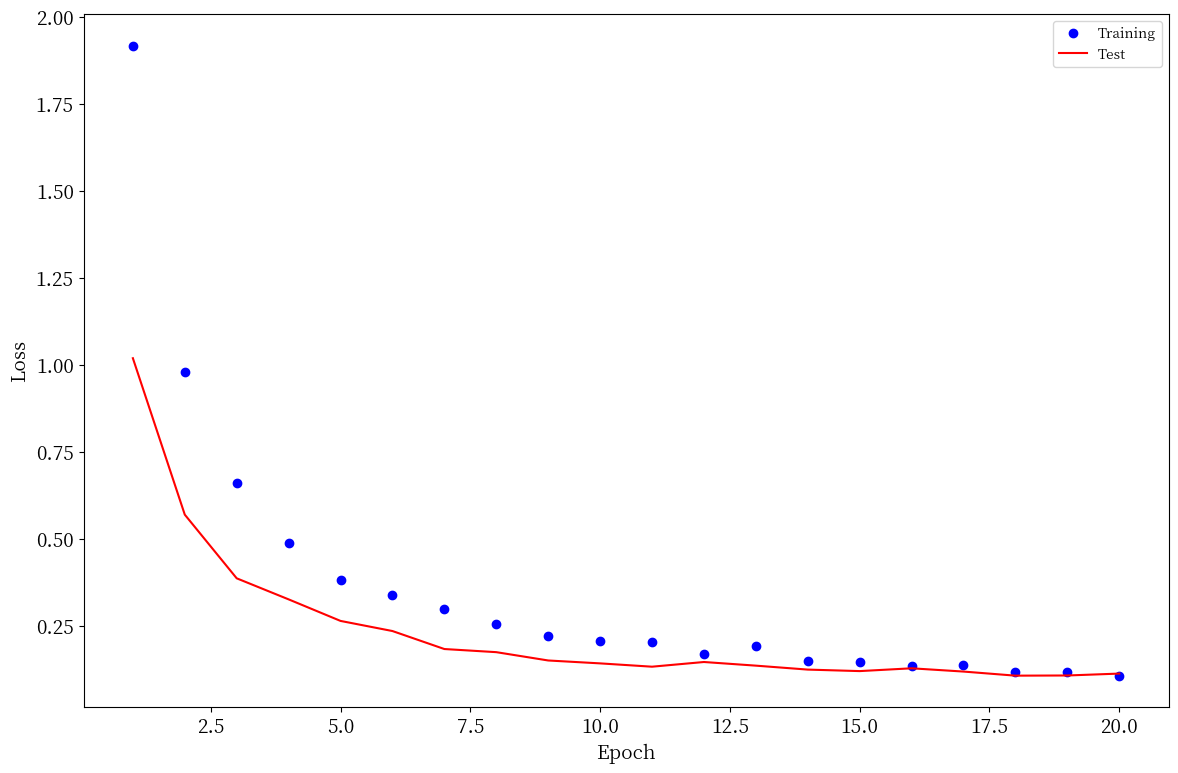

In [11]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)

plt.figure(figsize=(14, 9))
plt.plot(epochs, accuracy, "bo", label="Training")
plt.plot(epochs, val_accuracy, "r", label="Test")
plt.xlabel("Epoch", size=14)
plt.ylabel("Accuracy", size=14)
plt.legend()
plt.show()


plt.figure(figsize=(14, 9))
plt.plot(epochs, loss, "bo", label="Training")
plt.plot(epochs, val_loss, "r", label="Test")
plt.xlabel("Epoch", size=14)
plt.ylabel("Loss", size=14)
plt.legend()
plt.show()

141/141 [==============================] - 0s 3ms/step


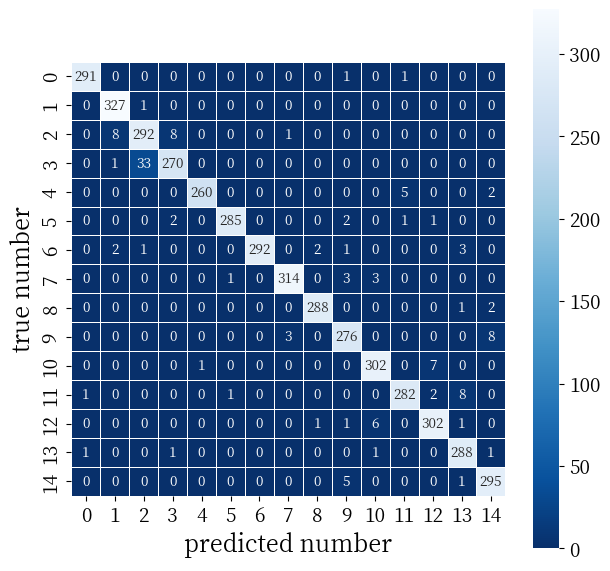

In [12]:
# confusion matrix
import seaborn as sns
from sklearn import metrics

y_pred = model.predict(X_test)
# convert one hot to vector
y_pred = np.argmax(y_pred, axis=1)

cm1 = metrics.confusion_matrix(np.argmax(y_test, axis=1), y_pred)

plt.figure(figsize=(7, 7))
sns.heatmap(cm1, annot=True, fmt=".0f", linewidths=0.5, square=True, cmap="Blues_r")
plt.ylabel("true number", size=17)
plt.xlabel("predicted number", size=17)
plt.show()

## 2) Learning an image as a function

**(5 points)**

The Universal approximation theorem asserts that even a neural networks with only one hidden layer can approximate any (mathematically well behaved) function. Now let's consider the function that describes one of our images. It depends on two variables: the coordinates of a given pixel. Therefore the function is only defined for 0<x<image_height, respectively 0<y<image_width. The output value of that function is a vector with three numbers, the R, G, and B value of that pixel.
Observe, that there is no test train split: all pixel coordinates will be used for training. 

In part a) of this exercise you will train a small neural network to learn a function describing an image. In part b) you will learn an interesting trick to improve that training. 

**a)** The first two cells already provide the feature values: *X* is an array containing all possible pixel coordinates (already normalized to go from 0 to 1). You have to then to create in cell 5 the appropriate target vector *y*  from the image matrix 'astro' which we load in cell three. If you succeeded then the two images in cell 6 will be identical.

Then built a neural network with 4 layers of 256 neurons (relu activation) each, followed by an output layer with sigmoid activation. Use *all* data to train that network using the following parameters: 
loss: mean squared error, optimizer: Adam, learning rate: 0.005, batch size 2000, number of epochs: 500. Also save the training history for part b.

Then make a prediction using *X* and display the learned image. Finally compute the Peak Signal-to-Noise Ratio (PSNR) using the original and the predicted image. PSNR is a concept that will be introduced in one of Tuesday's presentations.
(*2.5 points*) 

**b)** First we expand our feature vector *X* by adding 4 new columns. To create those, first rescale columns one and two so that they cover the range 0 to 2 pi. Columns three and four containe the sine and cosine of the rescaled first column, columns five and six containe the sine and cosine of the rescaled second column.  Observe that this expansion is completely generic; it has nothing to do with the image we try to learn.

Built another neural network identical to the first one, except for the changes you need to accomodate for the new *X*, then train the same way as in part a). Make a new prediction and display it (you should see a noticable improvement, though still not perfect result). Again, compute the PSNR. Finally, plot the two loss curves as a function of epoch number.  (*2.5 point*)   

**ANSWER**

In [13]:
# the features of our training data are the coordinates of a 256 by 256 square image
size = 256
X_int = np.stack([x for x in np.ndindex(size,size)])

# now we rescale our features to be between 0 and 1
X = X_int/255
print('X has {} rows (number of pixels) and {} columns (the x and y coordinate of those pixels)'.format(X_int.shape[0], X_int.shape[1]))

X has 65536 rows (number of pixels) and 2 columns (the x and y coordinate of those pixels)


In [14]:
print('the image rows increase slow, the image columns fast:\n',X)

the image rows increase slow, the image columns fast:
 [[0.         0.        ]
 [0.         0.00392157]
 [0.         0.00784314]
 ...
 [1.         0.99215686]
 [1.         0.99607843]
 [1.         1.        ]]


In [15]:
# creating our target function
from skimage import img_as_float
from skimage.io import imread
astro = imread('astronaut.png')
# we crop the top left corner to the right size
astro=astro[0:size, 0:size,:]

# convert the RGB channels to floats with range 0 to 1
astro = img_as_float(astro)
print(astro.min(), astro.max())

0.0 1.0


In [16]:
y = np.zeros((X_int.shape[0], 3))

y.shape

(65536, 3)

In [17]:
# the target vector has the same length than the feature vector,
# but contains 3 columns for the R,G, and B value of our image
y = np.zeros((X_int.shape[0],3))
for i, (j, k) in enumerate(X_int):
    y[i] = astro[j, k]

In [18]:
# your code here, writing the RGB values into the target vector y
# design a simple neural network
model = Sequential()
model.add(Dense(256, activation="relu", input_shape=(2,)))
model.add(Dense(256, activation="relu"))
model.add(Dense(256, activation="relu"))
model.add(Dense(256, activation="relu"))
model.add(Dense(3, activation="sigmoid"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 256)               768       
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 256)               65792     
                                                                 
 dense_5 (Dense)             (None, 256)               65792     
                                                                 
 dense_6 (Dense)             (None, 3)                 771       
                                                                 
Total params: 198915 (777.01 KB)
Trainable params: 198915 (777.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.Adam(learning_rate=0.005), metrics=["accuracy"])

In [20]:
# train the model
batch_size = 2000
epochs = 500

# history simple will save our training results
history = model.fit(
    X,
    y,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(X, y),
)

Epoch 1/500
33/33 [==============================] - 3s 21ms/step - loss: 0.0572 - accuracy: 0.8583 - val_loss: 0.0382 - val_accuracy: 0.8740
Epoch 2/500
33/33 [==============================] - 0s 12ms/step - loss: 0.0325 - accuracy: 0.8704 - val_loss: 0.0277 - val_accuracy: 0.8890
Epoch 3/500
33/33 [==============================] - 0s 12ms/step - loss: 0.0250 - accuracy: 0.8924 - val_loss: 0.0250 - val_accuracy: 0.9195
Epoch 4/500
33/33 [==============================] - 0s 12ms/step - loss: 0.0236 - accuracy: 0.9118 - val_loss: 0.0206 - val_accuracy: 0.9259
Epoch 5/500
33/33 [==============================] - 0s 12ms/step - loss: 0.0206 - accuracy: 0.9231 - val_loss: 0.0215 - val_accuracy: 0.9289
Epoch 6/500
33/33 [==============================] - 0s 12ms/step - loss: 0.0190 - accuracy: 0.9315 - val_loss: 0.0180 - val_accuracy: 0.9283
Epoch 7/500
33/33 [==============================] - 0s 11ms/step - loss: 0.0172 - accuracy: 0.9330 - val_loss: 0.0168 - val_accuracy: 0.9395
Epoch 

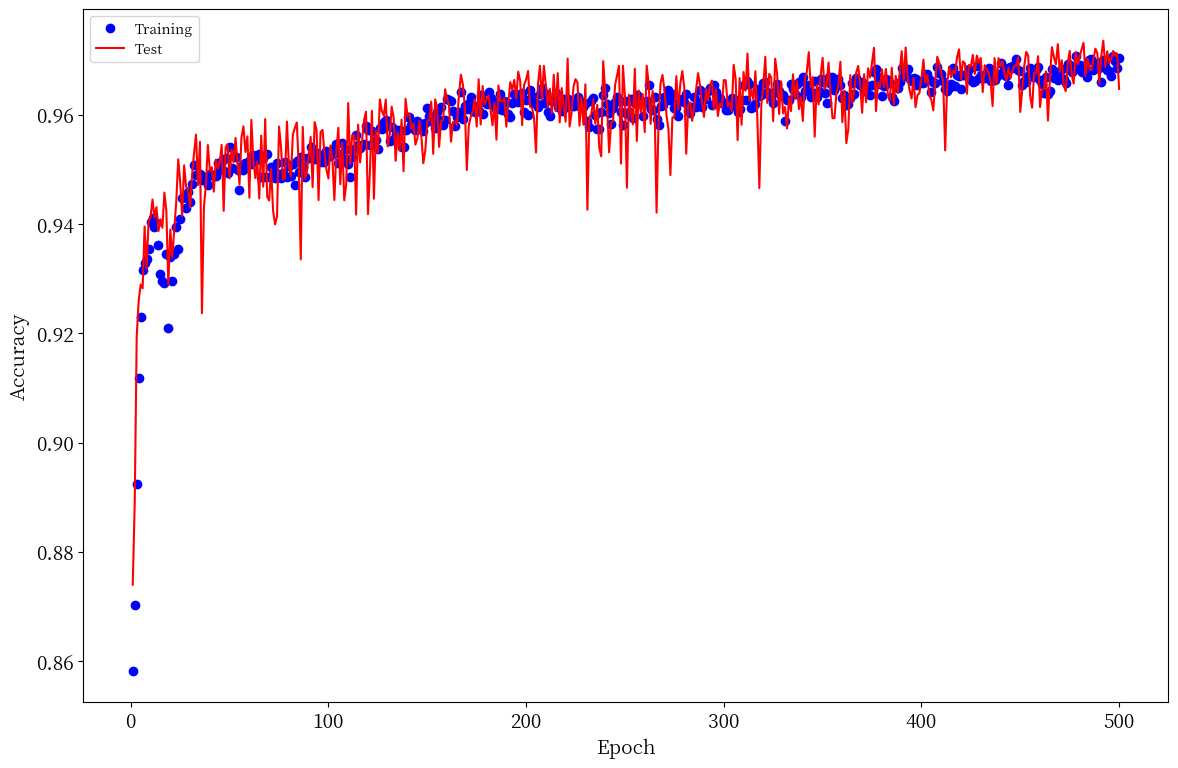

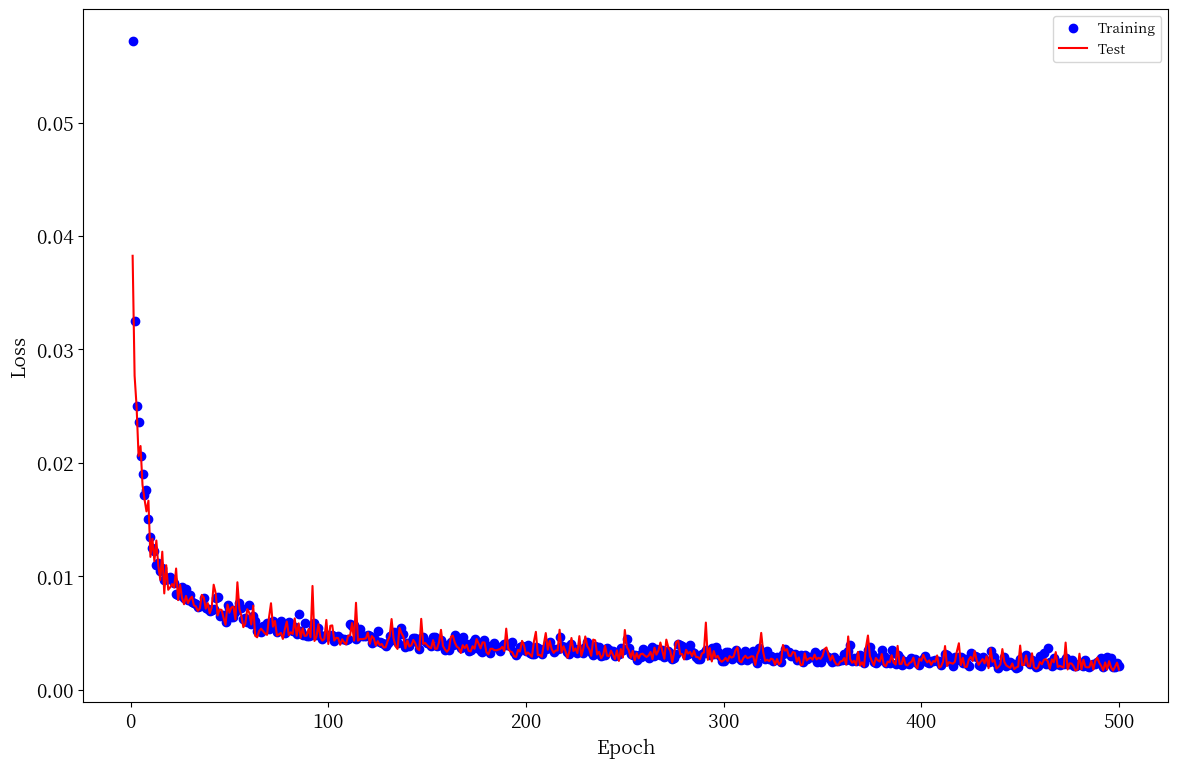

In [21]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)

plt.figure(figsize=(14, 9))
plt.plot(epochs, accuracy, "bo", label="Training")
plt.plot(epochs, val_accuracy, "r", label="Test")
plt.xlabel("Epoch", size=14)
plt.ylabel("Accuracy", size=14)
plt.legend()
plt.show()


plt.figure(figsize=(14, 9))
plt.plot(epochs, loss, "bo", label="Training")
plt.plot(epochs, val_loss, "r", label="Test")
plt.xlabel("Epoch", size=14)
plt.ylabel("Loss", size=14)
plt.legend()
plt.show()

2048/2048 [==============================] - 6s 3ms/step


Text(0.5, 1.0, 'reconstructed image')

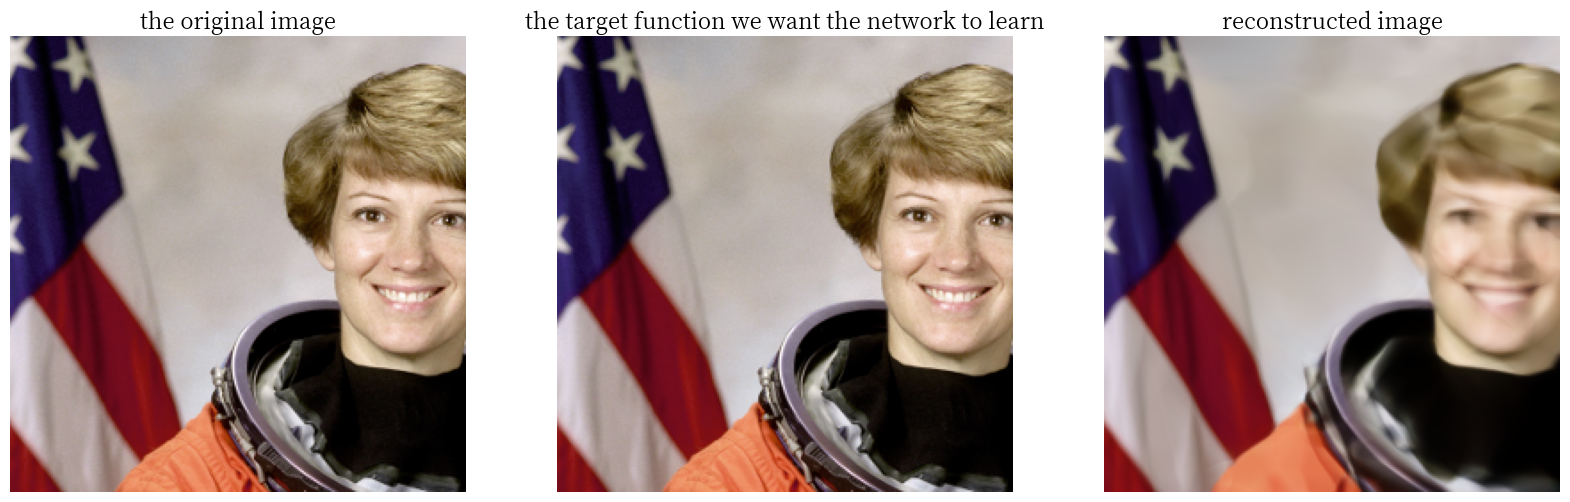

In [22]:
Y = model.predict(X)
# the two images need to be identical
plt.figure(figsize=(20, 6))

plt.subplot(131)
plt.imshow(astro)
plt.axis("off")
plt.title("the original image", fontsize=16)

plt.subplot(132)
plt.imshow(y.reshape(size, size, 3))  # reshape is important to make it an image again
plt.axis("off")
plt.title("the target function we want the network to learn", fontsize=16)

plt.subplot(133)
plt.imshow(Y.reshape(size, size, 3))  # reshape is important to make it an image again
plt.axis("off")
plt.title("reconstructed image", fontsize=16)

In [23]:
X_pi = X * 2 * np.pi
column3 = np.sin(X_pi[:, 0])
column4 = np.cos(X_pi[:, 0])
column5 = np.sin(X_pi[:, 1])
column6 = np.cos(X_pi[:, 1])
a = np.stack([column3, column4, column5, column6], axis=1)
new_X = np.concatenate((X_pi, a), axis=1)

In [24]:
model = Sequential()
model.add(Dense(256, activation="relu", input_shape=(6,)))
model.add(Dense(256, activation="relu"))
model.add(Dense(256, activation="relu"))
model.add(Dense(256, activation="relu"))
model.add(Dense(3, activation="sigmoid"))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 256)               1792      
                                                                 
 dense_8 (Dense)             (None, 256)               65792     
                                                                 
 dense_9 (Dense)             (None, 256)               65792     
                                                                 
 dense_10 (Dense)            (None, 256)               65792     
                                                                 
 dense_11 (Dense)            (None, 3)                 771       
                                                                 
Total params: 199939 (781.01 KB)
Trainable params: 199939 (781.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
model.compile(
    loss="mean_squared_error",
    optimizer=keras.optimizers.Adam(learning_rate=0.005),
    metrics=["accuracy"],
)

In [26]:
# train the model
batch_size = 2000
epochs = 500

# history simple will save our training results
history = model.fit(
    new_X,
    y,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(new_X, y),
)

Epoch 1/500
33/33 [==============================] - 2s 24ms/step - loss: 0.0417 - accuracy: 0.8403 - val_loss: 0.0241 - val_accuracy: 0.9255
Epoch 2/500
33/33 [==============================] - 0s 14ms/step - loss: 0.0210 - accuracy: 0.9097 - val_loss: 0.0159 - val_accuracy: 0.9054
Epoch 3/500
33/33 [==============================] - 0s 13ms/step - loss: 0.0143 - accuracy: 0.9113 - val_loss: 0.0124 - val_accuracy: 0.9230
Epoch 4/500
33/33 [==============================] - 0s 14ms/step - loss: 0.0112 - accuracy: 0.9281 - val_loss: 0.0104 - val_accuracy: 0.9376
Epoch 5/500
33/33 [==============================] - 0s 15ms/step - loss: 0.0109 - accuracy: 0.9404 - val_loss: 0.0091 - val_accuracy: 0.9516
Epoch 6/500
33/33 [==============================] - 0s 13ms/step - loss: 0.0083 - accuracy: 0.9468 - val_loss: 0.0077 - val_accuracy: 0.9547
Epoch 7/500
33/33 [==============================] - 0s 15ms/step - loss: 0.0075 - accuracy: 0.9505 - val_loss: 0.0073 - val_accuracy: 0.9466
Epoch 

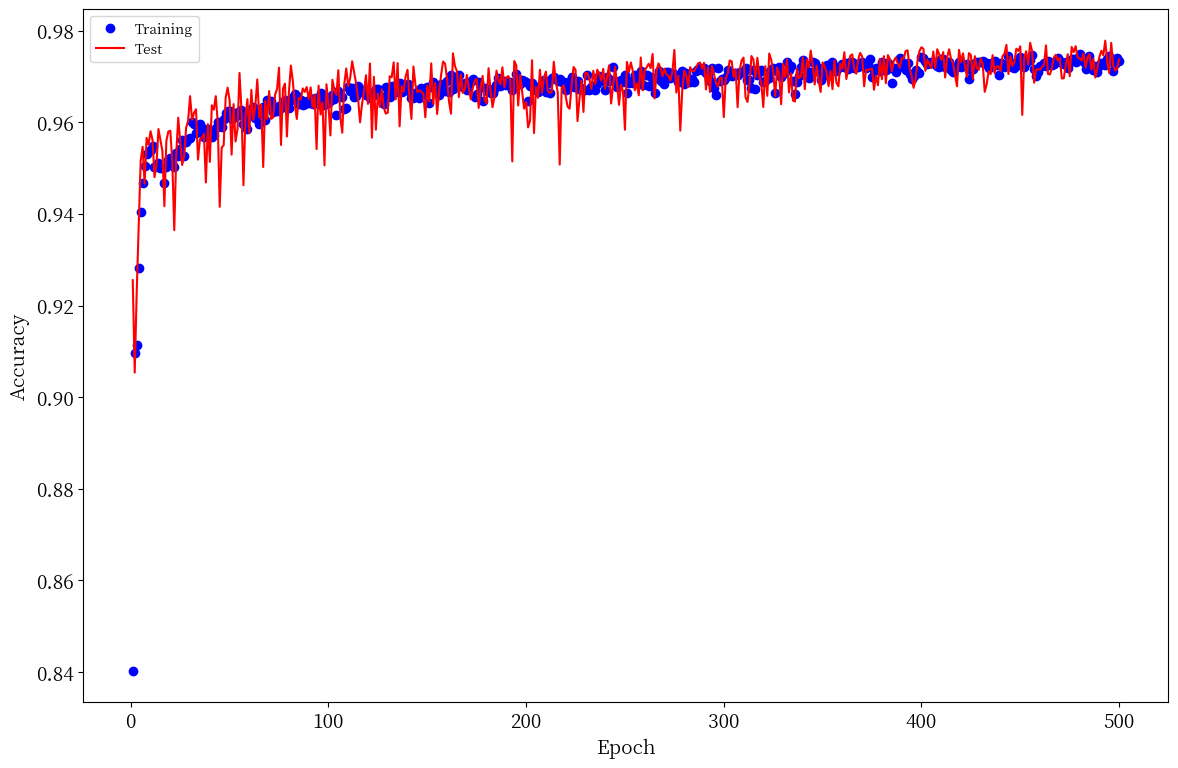

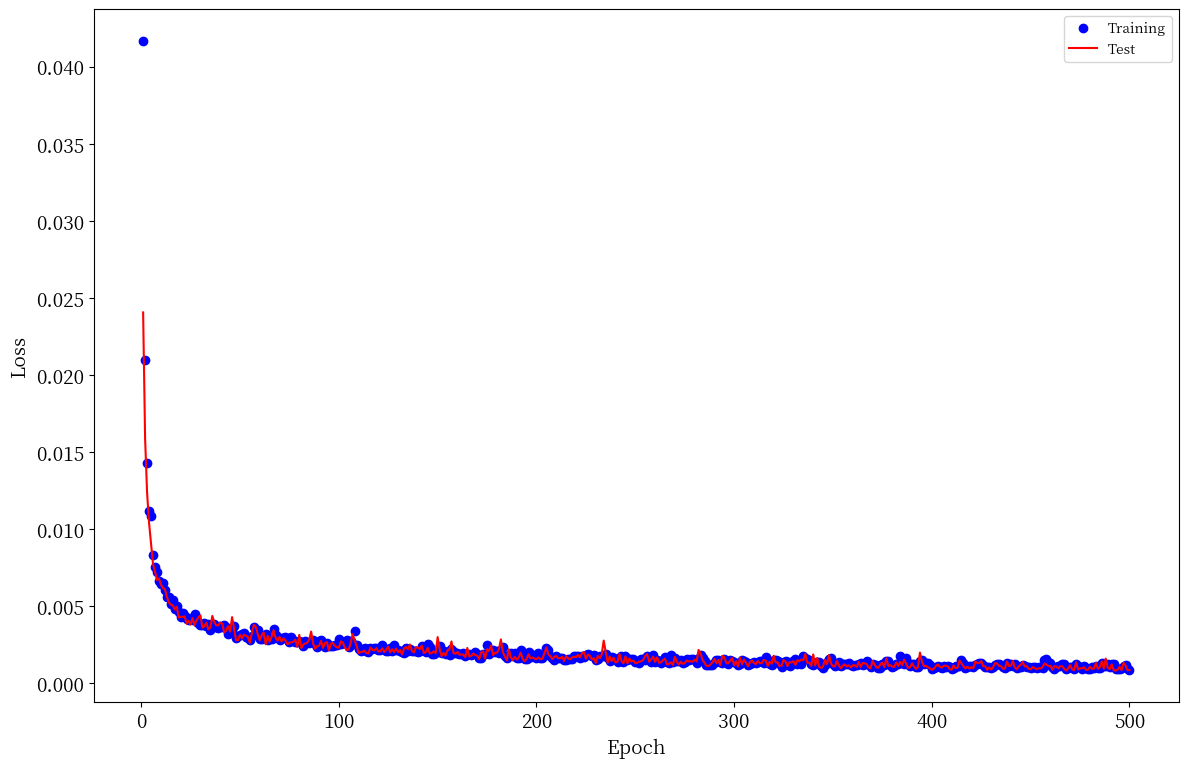

In [27]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)

plt.figure(figsize=(14, 9))
plt.plot(epochs, accuracy, "bo", label="Training")
plt.plot(epochs, val_accuracy, "r", label="Test")
plt.xlabel("Epoch", size=14)
plt.ylabel("Accuracy", size=14)
plt.legend()
plt.show()


plt.figure(figsize=(14, 9))
plt.plot(epochs, loss, "bo", label="Training")
plt.plot(epochs, val_loss, "r", label="Test")
plt.xlabel("Epoch", size=14)
plt.ylabel("Loss", size=14)
plt.legend()
plt.show()

2048/2048 [==============================] - 5s 2ms/step


Text(0.5, 1.0, 'reconstructed image')

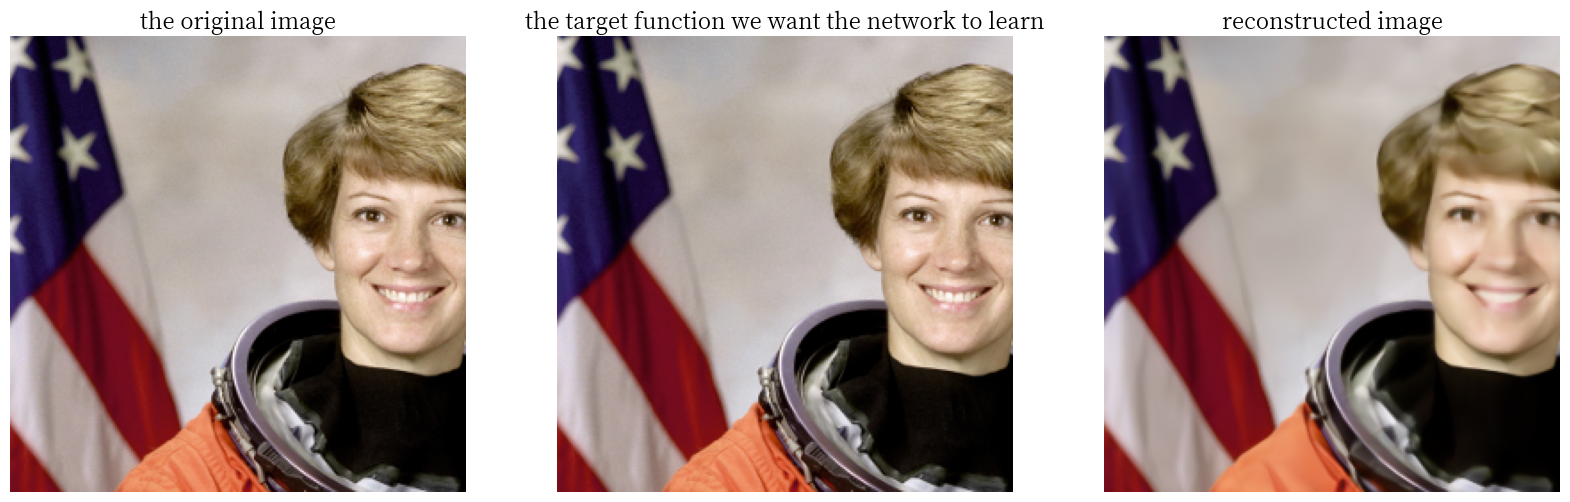

In [28]:
Y = model.predict(new_X)
# the two images need to be identical
plt.figure(figsize=(20, 6))

plt.subplot(131)
plt.imshow(astro)
plt.axis("off")
plt.title("the original image", fontsize=16)

plt.subplot(132)
plt.imshow(y.reshape(size, size, 3))  # reshape is important to make it an image again
plt.axis("off")
plt.title("the target function we want the network to learn", fontsize=16)

plt.subplot(133)
plt.imshow(Y.reshape(size, size, 3))  # reshape is important to make it an image again
plt.axis("off")
plt.title("reconstructed image", fontsize=16)